<a href="https://colab.research.google.com/github/ankitg-02/sales_analysis/blob/main/Home_Office.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [45]:
#importing data from excelsheet
home_office_sales=pd.read_excel("/content/Sample-sales-data-excel.xls")
data=pd.DataFrame(home_office_sales)
data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
496,497,CA-2016-126158,2016-07-25,2016-07-31,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Costa Mesa,...,92627,West,OFF-BI-10002498,Office Supplies,Binders,Clear Mylar Reinforcing Strips,119.616,8,0.2,40.3704
8936,8937,CA-2015-134117,2015-12-17,2015-12-19,Second Class,PG-18895,Paul Gonzalez,Consumer,United States,Los Angeles,...,90008,West,OFF-AR-10003903,Office Supplies,Art,Sanford 52201 APSCO Electric Pencil Sharpener,204.850,5,0.0,53.2610
1706,1707,CA-2017-123491,2017-10-30,2017-11-05,Standard Class,JK-15205,Jamie Kunitz,Consumer,United States,San Francisco,...,94122,West,OFF-LA-10003077,Office Supplies,Labels,Avery 500,43.860,6,0.0,20.6142
3146,3147,CA-2017-131828,2017-02-11,2017-02-13,Second Class,CS-11845,Cari Sayre,Corporate,United States,Seattle,...,98105,West,TEC-PH-10002923,Technology,Phones,Logitech B530 USB Headset - headset - Full siz...,88.776,3,0.2,7.7679
8134,8135,CA-2015-121776,2015-02-16,2015-02-21,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Los Angeles,...,90008,West,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,36.840,3,0.0,17.3148


In [46]:
home_office=data.groupby("Segment")
home_office_mod=home_office.get_group("Home Office")
home_office_mod

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.4720,3,0.20,9.9468
37,38,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,OFF-EN-10002986,Office Supplies,Envelopes,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.3280,9,0.20,35.4150
38,39,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.3600,2,0.00,6.4128
9976,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.5840,2,0.20,31.1980
9977,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7,0.00,0.0000
9978,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.3760,4,0.20,4.6816


In [47]:
home_office_mod.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [48]:
home_office_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1783 entries, 14 to 9979
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         1783 non-null   int64         
 1   Order ID       1783 non-null   object        
 2   Order Date     1783 non-null   datetime64[ns]
 3   Ship Date      1783 non-null   datetime64[ns]
 4   Ship Mode      1783 non-null   object        
 5   Customer ID    1783 non-null   object        
 6   Customer Name  1783 non-null   object        
 7   Segment        1783 non-null   object        
 8   Country        1783 non-null   object        
 9   City           1783 non-null   object        
 10  State          1783 non-null   object        
 11  Postal Code    1783 non-null   int64         
 12  Region         1783 non-null   object        
 13  Product ID     1783 non-null   object        
 14  Category       1783 non-null   object        
 15  Sub-Category   1783 non-n

In [49]:
for i in home_office_mod.columns:
  print(i,':','\n',home_office_mod[i].unique())


Row ID : 
 [  15   16   35 ... 9978 9979 9980]
Order ID : 
 ['US-2015-118983' 'CA-2017-107727' 'CA-2015-117415' 'US-2015-164175'
 'US-2017-119662' 'CA-2016-159695' 'US-2017-109484' 'CA-2017-161018'
 'CA-2016-158568' 'CA-2015-129476' 'US-2014-152030' 'US-2016-125969'
 'CA-2014-110072' 'CA-2016-158834' 'CA-2015-118948' 'CA-2015-137225'
 'CA-2014-158274' 'CA-2014-123260' 'CA-2015-102281' 'CA-2017-107720'
 'US-2017-100930' 'CA-2014-131926' 'CA-2016-110772' 'CA-2014-111003'
 'CA-2014-164973' 'CA-2016-129714' 'CA-2017-102946' 'CA-2015-122259'
 'CA-2014-101476' 'US-2016-123750' 'CA-2016-147375' 'CA-2016-109869'
 'US-2015-101399' 'CA-2017-140963' 'CA-2014-133753' 'CA-2017-127432'
 'CA-2017-113558' 'CA-2015-147851' 'CA-2017-162929' 'CA-2017-163020'
 'CA-2016-115917' 'US-2017-127719' 'CA-2017-126221' 'CA-2016-132661'
 'US-2016-156097' 'US-2017-106663' 'CA-2015-119291' 'CA-2014-113887'
 'CA-2014-104472' 'CA-2016-112942' 'CA-2014-117429' 'CA-2017-131954'
 'CA-2014-112326' 'CA-2015-144267' 'US-2017

In [50]:
home_office_mod.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,1783.000000,1783,1783,1783,1783,1783,1783,1783,1783,1783,...,1783.000000,1783,1783,1783,1783,1783,1783.000000,1783.000000,1783.000000,1783.000000
unique,NaN,909,NaN,NaN,4,148,148,1,1,264,...,NaN,4,1112,3,17,1106,NaN,NaN,NaN,NaN
top,NaN,US-2016-108504,NaN,NaN,Standard Class,MA-17560,Matt Abelman,Home Office,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Easy-staple paper,NaN,NaN,NaN,NaN
freq,NaN,11,NaN,NaN,1071,34,34,1783,1783,145,...,NaN,571,8,1079,270,13,NaN,NaN,NaN,NaN
mean,4968.565339,NaN,2016-06-01 10:59:49.904655104,2016-06-05 09:07:34.290521600,NaN,NaN,NaN,NaN,NaN,NaN,...,55051.998317,NaN,NaN,NaN,NaN,NaN,240.972041,3.782389,0.147128,33.818664
min,15.000000,NaN,2014-01-04 00:00:00,2014-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.990000,1.000000,0.000000,-3399.980000
25%,2583.500000,NaN,2015-08-08 00:00:00,2015-08-12 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,23464.000000,NaN,NaN,NaN,NaN,NaN,17.045000,2.000000,0.000000,1.984250
50%,4823.000000,NaN,2016-08-29 00:00:00,2016-09-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,55113.000000,NaN,NaN,NaN,NaN,NaN,52.440000,3.000000,0.000000,9.102000
75%,7624.500000,NaN,2017-05-22 00:00:00,2017-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90004.000000,NaN,NaN,NaN,NaN,NaN,210.906000,5.000000,0.200000,31.559850
max,9980.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99207.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,3919.988800


**Exploritory Data Analysis**

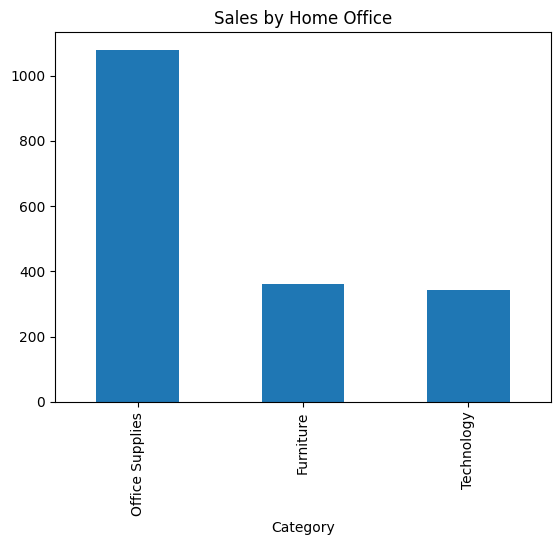

In [51]:
#category-wise sales distribution by home office
home_office_mod['Category'].value_counts().plot(kind='bar')
plt.title("Sales by Home Office")
plt.show()

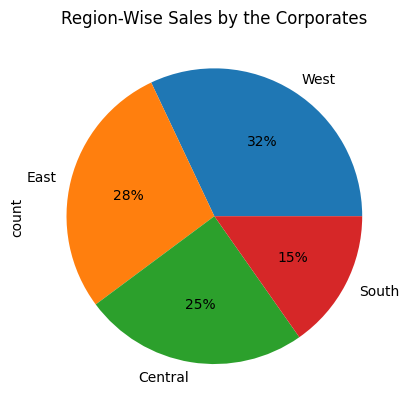

In [52]:
#distirbution of sales pattern about the region by the home office category
home_office_mod['Region'].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.title("Region-Wise Sales by the Corporates")
plt.show()

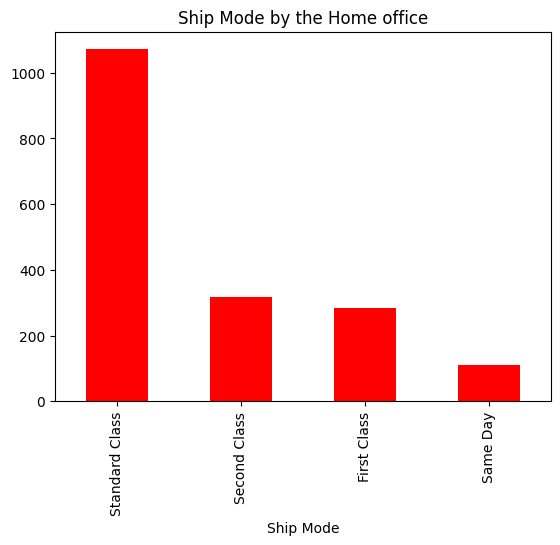

In [53]:
#Shipping mode of items ordered by home office segment
home_office_mod['Ship Mode'].value_counts().plot(kind='bar',color='red')
plt.title("Ship Mode by the Home office")
plt.show()

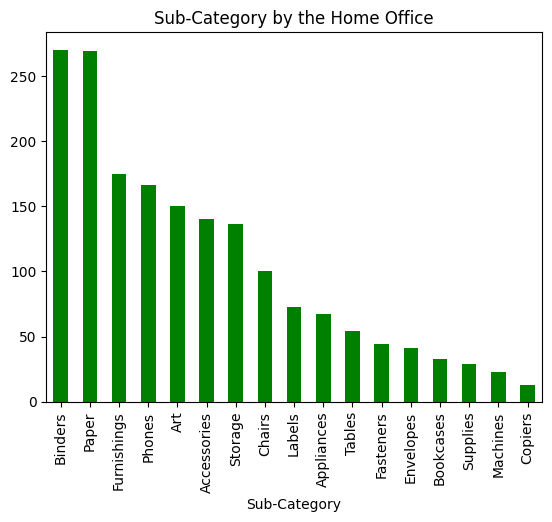

In [54]:
#sub-category items ordered by the Home office segment
home_office_mod['Sub-Category'].value_counts().plot(kind='bar',color='green')
plt.title("Sub-Category by the Home Office")
plt.show()

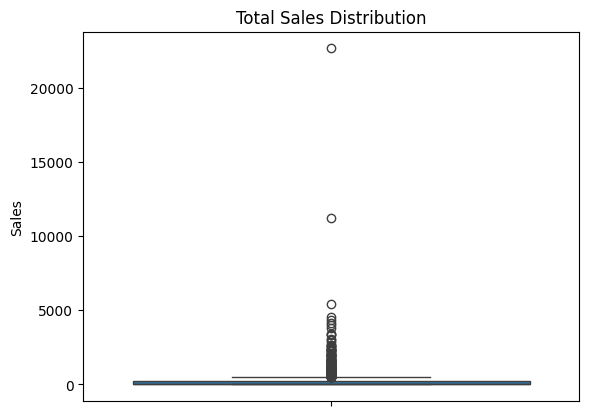

In [55]:
#sales pattern distribution
sns.boxplot(home_office_mod['Sales'])
plt.title("Total Sales Distribution")
plt.show()

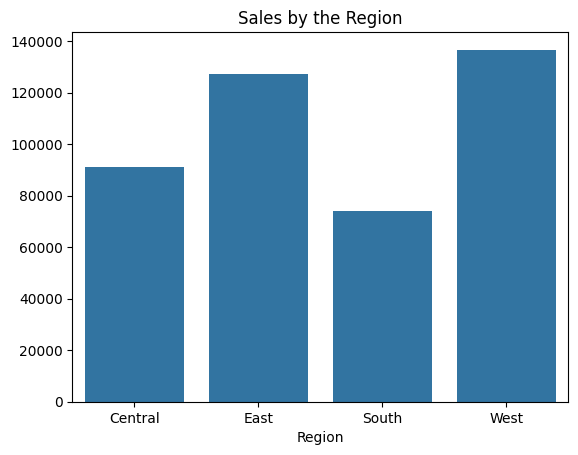

In [56]:
#sales distribution pattern region-wise
sales_region=home_office_mod.groupby('Region')['Sales'].sum()
sns.barplot(x=sales_region.index,y=sales_region.values)
plt.title("Sales by the Region")
plt.show()

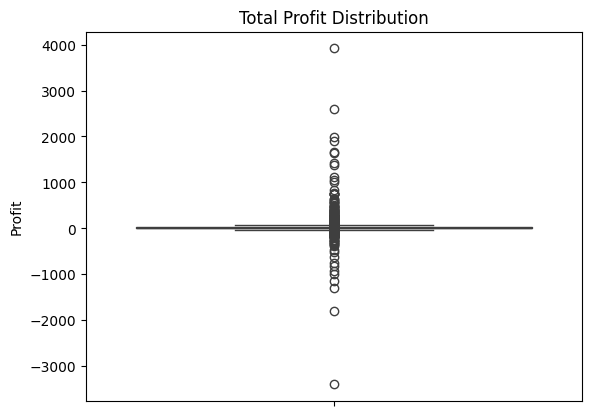

In [57]:
#profit pattern distribution
sns.boxplot(home_office_mod['Profit'])
plt.title("Total Profit Distribution")
plt.show()

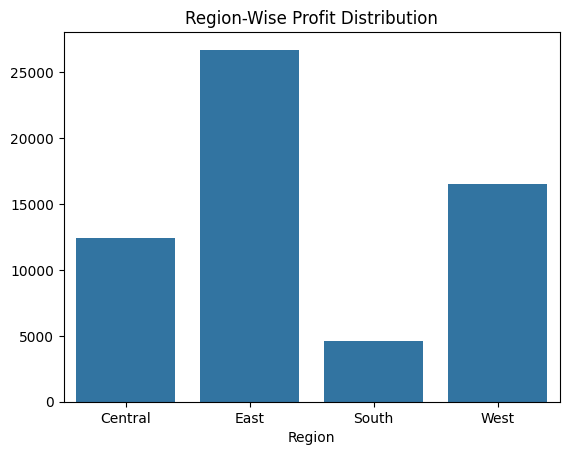

In [58]:
#profit pattern distribution
profit_by_region=home_office_mod.groupby('Region')['Profit'].sum()
sns.barplot(y=profit_by_region.values,x=profit_by_region.index)
plt.title("Region-Wise Profit Distribution")
plt.show()

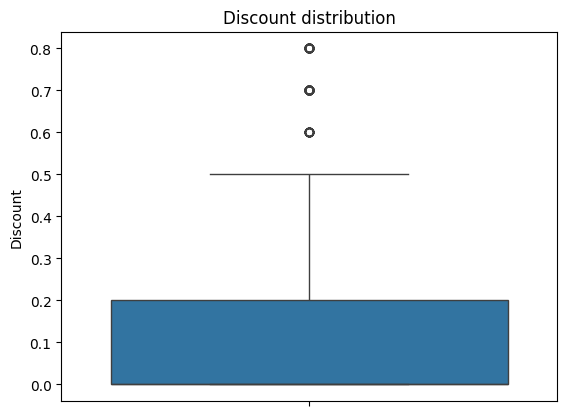

In [59]:
#discount pattern distribution
sns.boxplot(home_office_mod['Discount'])
plt.title("Discount distribution")
plt.show()

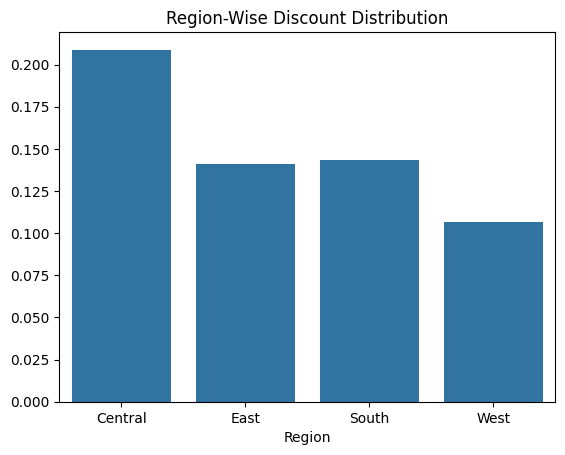

In [60]:
#discount pattern distribution
discount_by_region=home_office_mod.groupby('Region')['Discount'].mean()
sns.barplot(y=discount_by_region.values,x=discount_by_region.index)
plt.title("Region-Wise Discount Distribution")
plt.show()

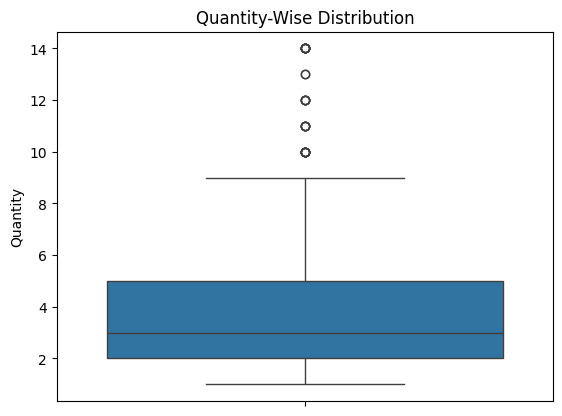

In [61]:
#quantity pattern distribution
sns.boxplot(home_office_mod['Quantity'])
plt.title("Quantity-Wise Distribution")
plt.show()

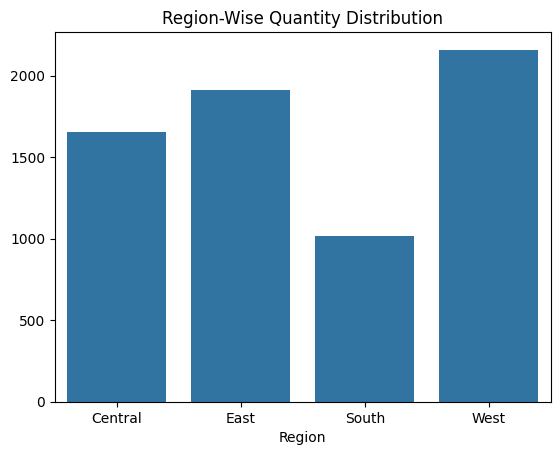

In [62]:
#quantity pattern distribution
quantity_by_region=home_office_mod.groupby('Region')['Quantity'].sum()
sns.barplot(y=quantity_by_region.values,x=quantity_by_region.index)
plt.title("Region-Wise Quantity Distribution")
plt.show()

In [63]:
oe=OrdinalEncoder()
home_office_mod['Ship Mode']=oe.fit_transform(home_office_mod[['Ship Mode']])
home_office_mod['City']=oe.fit_transform(home_office_mod[['City']])
home_office_mod['State']=oe.fit_transform(home_office_mod[['State']])
home_office_mod['Region']=oe.fit_transform(home_office_mod[['Region']])
home_office_mod['Category']=oe.fit_transform(home_office_mod[['Category']])
home_office_mod['Sub-Category']=oe.fit_transform(home_office_mod[['Sub-Category']])
home_office_mod['Segment']=oe.fit_transform(home_office_mod[['Segment']])
home_office_mod['Country']=oe.fit_transform(home_office_mod[['Country']])

<ipython-input-63-04f7ee526013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_office_mod['Ship Mode']=oe.fit_transform(home_office_mod[['Ship Mode']])
<ipython-input-63-04f7ee526013>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_office_mod['City']=oe.fit_transform(home_office_mod[['City']])
<ipython-input-63-04f7ee526013>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [64]:
home_office_mod.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2015-118983,2015-11-22,2015-11-26,3.0,HP-14815,Harold Pawlan,0.0,0.0,76.0,...,76106,0.0,OFF-AP-10002311,1.0,1.0,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,3.0,HP-14815,Harold Pawlan,0.0,0.0,76.0,...,76106,0.0,OFF-BI-10000756,1.0,3.0,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
34,35,CA-2017-107727,2017-10-19,2017-10-23,2.0,MA-17560,Matt Abelman,0.0,0.0,101.0,...,77095,0.0,OFF-PA-10000249,1.0,12.0,Easy-staple paper,29.4720,3,0.20,9.9468
37,38,CA-2015-117415,2015-12-27,2015-12-31,3.0,SN-20710,Steve Nguyen,0.0,0.0,101.0,...,77041,0.0,OFF-EN-10002986,1.0,7.0,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.3280,9,0.20,35.4150
38,39,CA-2015-117415,2015-12-27,2015-12-31,3.0,SN-20710,Steve Nguyen,0.0,0.0,101.0,...,77041,0.0,FUR-BO-10002545,0.0,4.0,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764


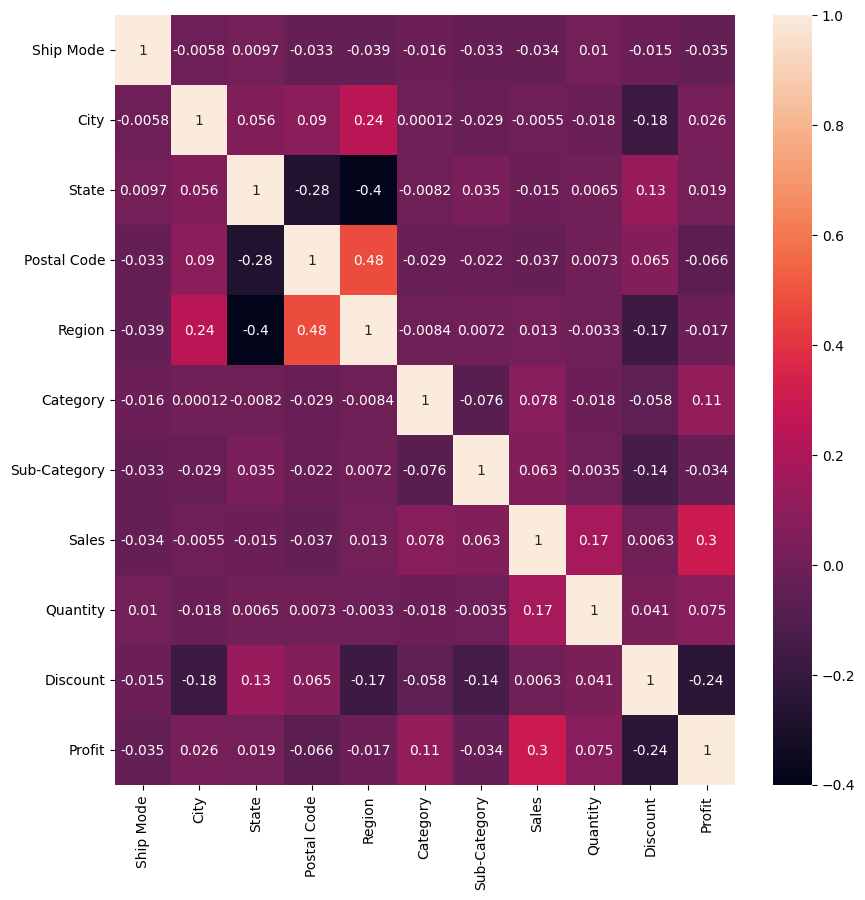

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(home_office_mod.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1).corr(),annot=True)
plt.show()

In [66]:
home_office_mod=pd.DataFrame(home_office_mod.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1))
home_office_mod.head()

,Ship Mode,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,3.0,76.0,40.0,76106,0.0,1.0,1.0,68.8100,5,0.80,-123.8580
15,3.0,76.0,40.0,76106,0.0,1.0,3.0,2.5440,3,0.80,-3.8160
34,2.0,101.0,40.0,77095,0.0,1.0,12.0,29.4720,3,0.20,9.9468
37,3.0,101.0,40.0,77041,0.0,1.0,7.0,113.3280,9,0.20,35.4150
38,3.0,101.0,40.0,77041,0.0,0.0,4.0,532.3992,3,0.32,-46.9764


In [67]:
s=StandardScaler()
home_office_mod['Quantity']=s.fit_transform(home_office_mod[['Quantity']])
home_office_mod['Discount']=s.fit_transform(home_office_mod[['Discount']])

In [68]:
for i in home_office_mod.columns:
  if home_office_mod[i].dtype=='int':
    print(i,':\n')
    q3=home_office_mod[i].quantile(0.75)
    q1=home_office_mod[i].quantile(0.25)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    print(f'upper limit of {i}:',upper_limit)
    print(f'lower limit of {i}:',lower_limit)
  elif home_office_mod[i].dtype=='float':
    print(i,':\n')
    q3=home_office_mod[i].quantile(0.75)
    q1=home_office_mod[i].quantile(0.25)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    print(f'upper limit of {i}:',upper_limit)
    print(f'lower limit of {i}:',lower_limit)

Ship Mode :

upper limit of Ship Mode: 4.5
lower limit of Ship Mode: 0.5
City :

upper limit of City: 364.5
lower limit of City: -79.5
State :

upper limit of State: 81.0
lower limit of State: -39.0
Postal Code :

upper limit of Postal Code: 189814.0
lower limit of Postal Code: -76346.0
Region :

upper limit of Region: 6.0
lower limit of Region: -2.0
Category :

upper limit of Category: 1.0
lower limit of Category: 1.0
Sub-Category :

upper limit of Sub-Category: 25.5
lower limit of Sub-Category: -10.5
Sales :

upper limit of Sales: 501.6975
lower limit of Sales: -273.74649999999997
Quantity :

upper limit of Quantity: 2.5370699068635285
lower limit of Quantity: -2.787678509169828
Discount :

upper limit of Discount: 1.7377485492500377
lower limit of Discount: -2.2019251965583346
Profit :

upper limit of Profit: 75.92324999999995
lower limit of Profit: -42.379149999999974


In [69]:
home_office_mod=home_office_mod[
    (home_office_mod['Quantity']>=0)&(home_office_mod['Quantity']<=2.5370699068635285) &
    (home_office_mod['Discount']>=0)&(home_office_mod['Discount']<1) &
    (home_office_mod['Sales']>=0)&(home_office_mod['Sales']<=501.6975)
]

In [70]:
#splitting the dataset
x=home_office_mod.drop(columns=['Sales'],axis='1')
y=home_office_mod['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.5,random_state=4)

**Predictive Models**

In [71]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor(n_estimators=200)
model_4 = GradientBoostingRegressor()
model_5 = AdaBoostRegressor()
model_6 = DecisionTreeRegressor(max_depth=2)
model_7 = KNeighborsRegressor()
model_8 = SVR()
model_9=Ridge()
model_10=Lasso()

In [72]:
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)
model_4.fit(x_train, y_train)
model_5.fit(x_train, y_train)
model_6.fit(x_train, y_train)
model_7.fit(x_train, y_train)
model_8.fit(x_train, y_train)
model_9.fit(x_train, y_train)
model_10.fit(x_train, y_train)

Lasso()

**Predictive Model's Performance**

In [73]:
pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(x_test)
pred_3 = model_3.predict(x_test)
pred_4=model_4.predict(x_test)
pred_5=model_5.predict(x_test)
pred_6=model_6.predict(x_test)
pred_7=model_7.predict(x_test)
pred_8=model_8.predict(x_test)
pred_9=model_9.predict(x_test)
pred_10=model_10.predict(x_test)

In [74]:
pred1 = model_1.predict(x_val)
pred2 = model_2.predict(x_val)
pred3 = model_3.predict(x_val)
pred4=model_4.predict(x_val)
pred5=model_5.predict(x_val)
pred6=model_6.predict(x_val)
pred7=model_7.predict(x_val)
pred8=model_8.predict(x_val)
pred9=model_9.predict(x_val)
pred10=model_10.predict(x_val)

test set for model1
Performance of Model 1:

Mean Squared Error: 12418.317918887647 

Root Mean Squared Error: 111.43750678693259 

Mean Absolute Error: 88.6320631374242 

Explained Variance Score: 0.2350039675679252 

R2 Score: 0.22442202068350292 





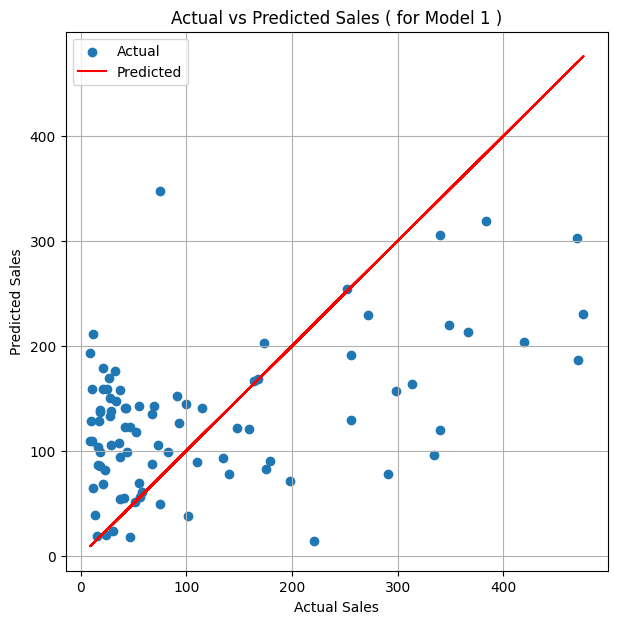



validation set for model1
Performance of Model 1:

Mean Squared Error: 27896.57407651925 

Root Mean Squared Error: 167.02267533637237 

Mean Absolute Error: 121.50911092548354 

Explained Variance Score: -0.476437081092127 

R2 Score: -0.4764625131512077 





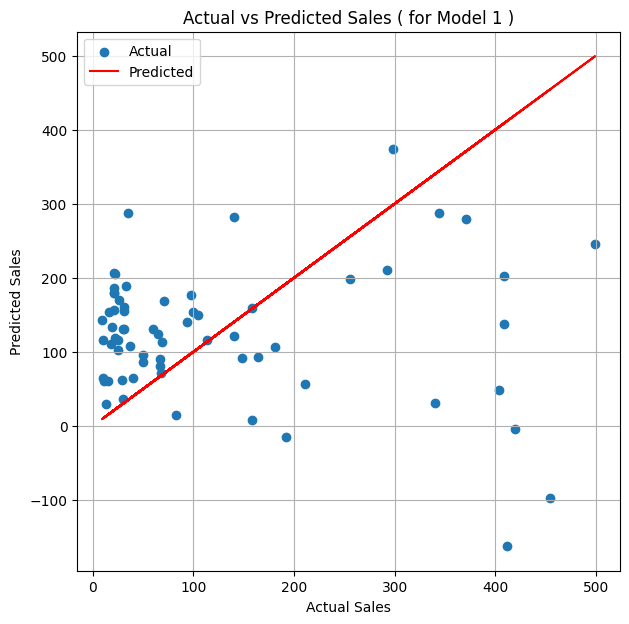

test set for model2
Performance of Model 2:

Mean Squared Error: 7929.19343022921 

Root Mean Squared Error: 89.04601860964482 

Mean Absolute Error: 61.659815483283985 

Explained Variance Score: 0.5239848319949472 

R2 Score: 0.5047873747157484 





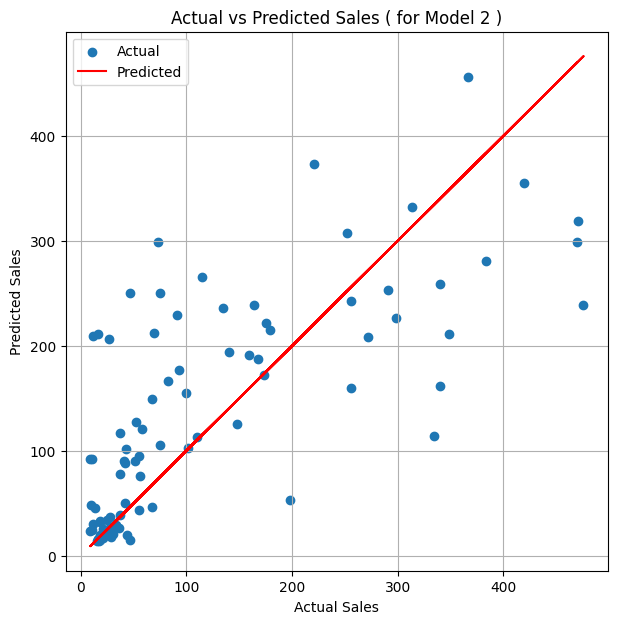



validation set for model2
Performance of Model 2:

Mean Squared Error: 10626.74742798142 

Root Mean Squared Error: 103.08611656271381 

Mean Absolute Error: 67.42047642644246 

Explained Variance Score: 0.4376305009541215 

R2 Score: 0.4375655529921517 





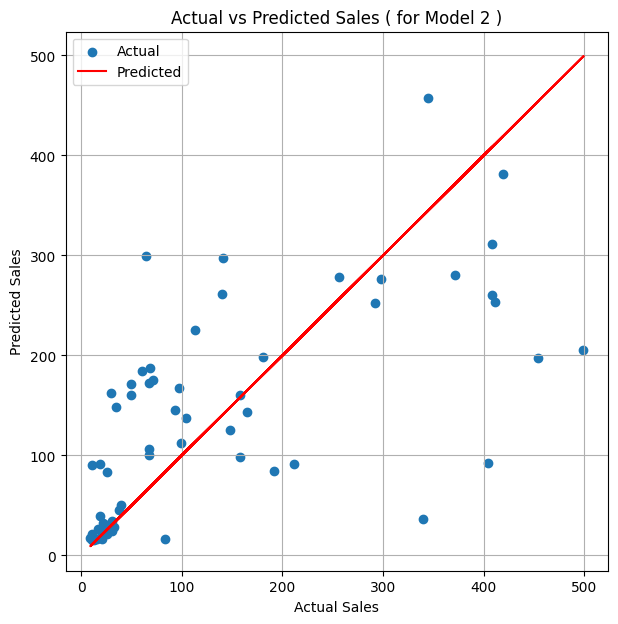

test set for model3
Performance of Model 3:

Mean Squared Error: 5024.464781167074 

Root Mean Squared Error: 70.88345915068673 

Mean Absolute Error: 48.695315738636346 

Explained Variance Score: 0.6928901739966546 

R2 Score: 0.6862003157289501 





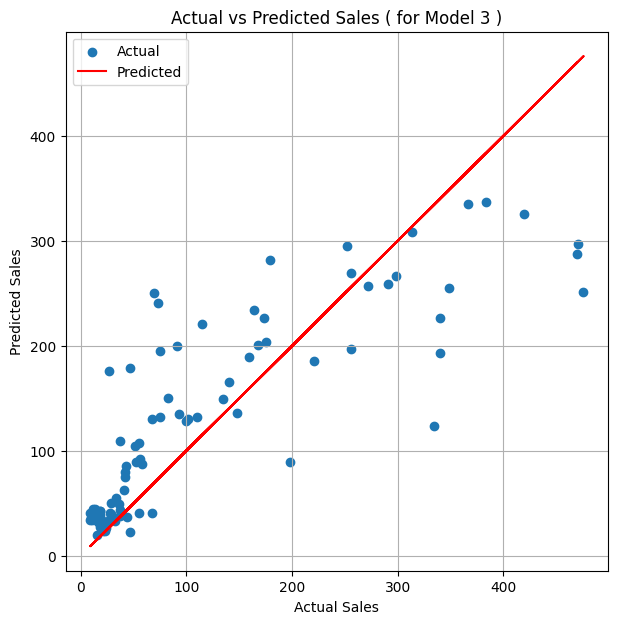



validation set for model3
Performance of Model 3:

Mean Squared Error: 8728.216721965784 

Root Mean Squared Error: 93.42492559250869 

Mean Absolute Error: 62.152108787878774 

Explained Variance Score: 0.5383591807524204 

R2 Score: 0.538047763094717 





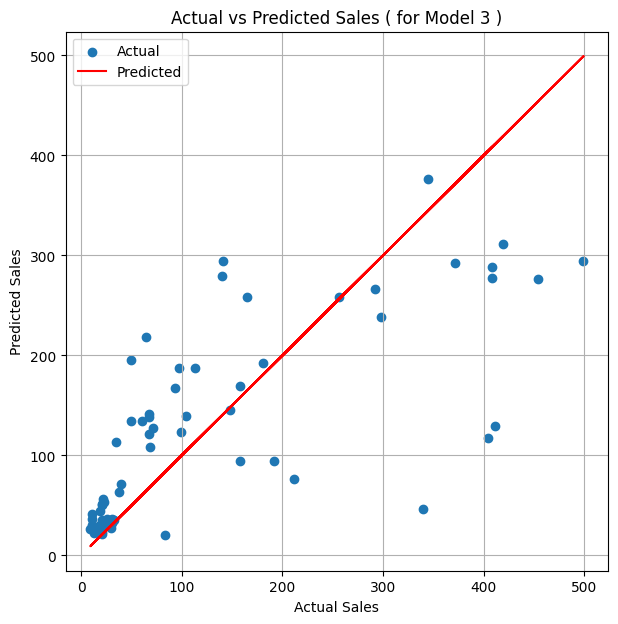

test set for model4
Performance of Model 4:

Mean Squared Error: 6107.761647734029 

Root Mean Squared Error: 78.15216982102307 

Mean Absolute Error: 49.11215279376101 

Explained Variance Score: 0.621789993309291 

R2 Score: 0.6185437135820508 





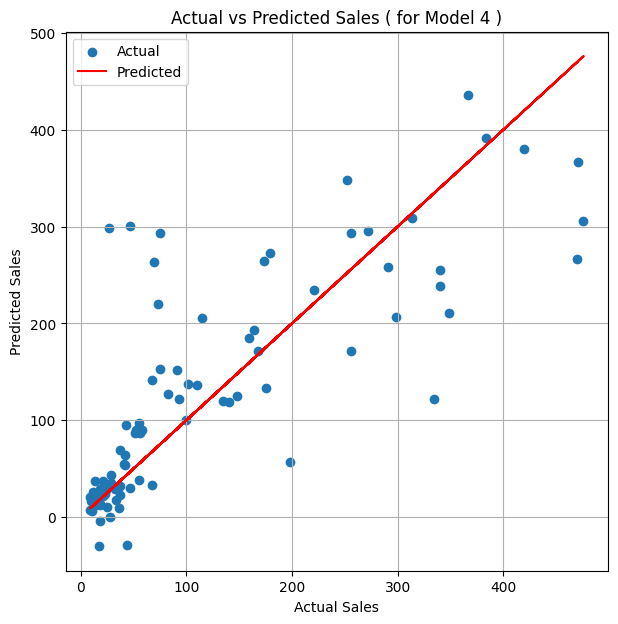



validation set for model4
Performance of Model 4:

Mean Squared Error: 7258.658042906813 

Root Mean Squared Error: 85.1977584382759 

Mean Absolute Error: 57.383840898388534 

Explained Variance Score: 0.6161453844868545 

R2 Score: 0.6158260700135179 





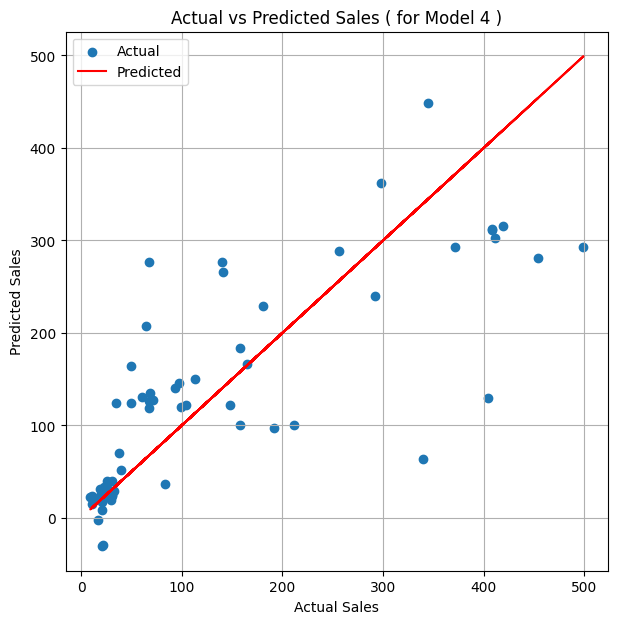

test set for model5
Performance of Model 5:

Mean Squared Error: 6756.837978182547 

Root Mean Squared Error: 82.19998770183939 

Mean Absolute Error: 62.39879461795786 

Explained Variance Score: 0.617998430041274 

R2 Score: 0.578006072970856 





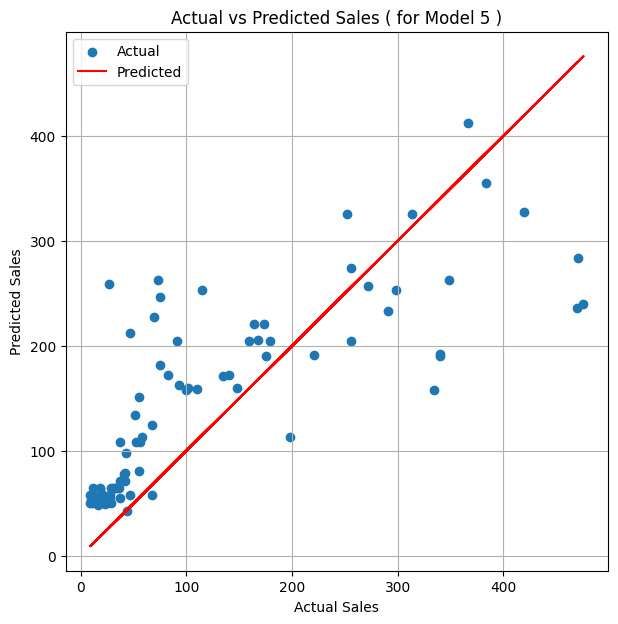



validation set for model5
Performance of Model 5:

Mean Squared Error: 8229.572154952844 

Root Mean Squared Error: 90.71698934021589 

Mean Absolute Error: 69.25921219590337 

Explained Variance Score: 0.5774377735062781 

R2 Score: 0.564439176196615 





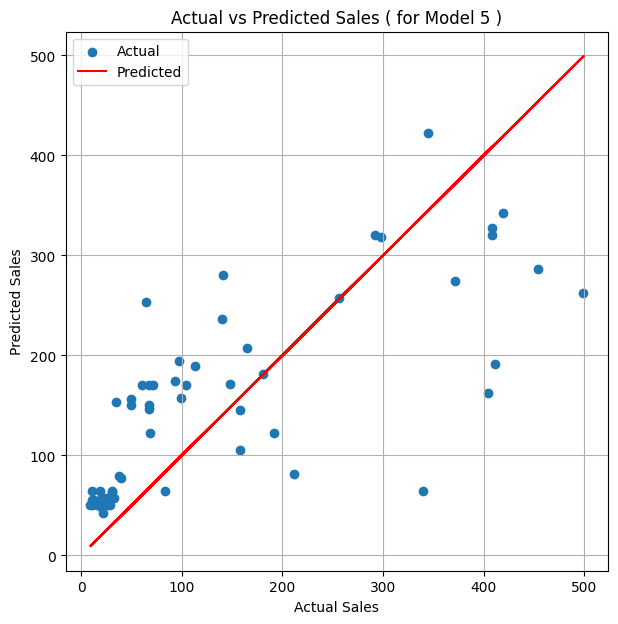

test set for model6
Performance of Model 6:

Mean Squared Error: 8906.047825531532 

Root Mean Squared Error: 94.37185928830444 

Mean Absolute Error: 67.3842918560606 

Explained Variance Score: 0.4946464096578699 

R2 Score: 0.44377856797206705 





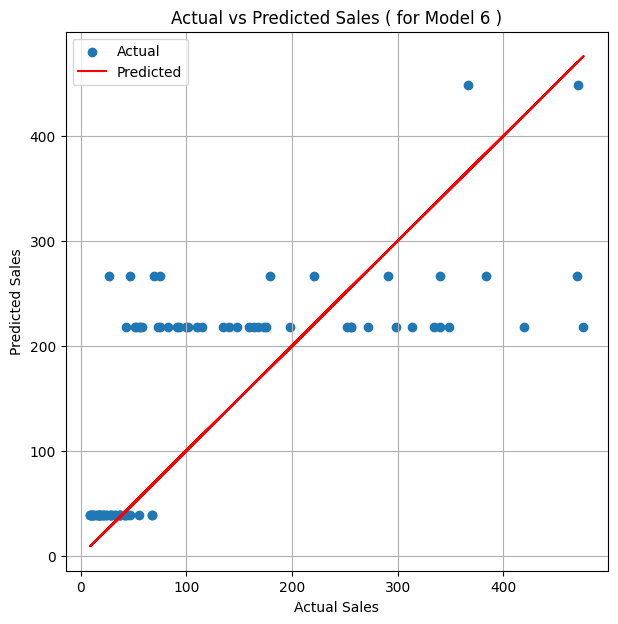



validation set for model6
Performance of Model 6:

Mean Squared Error: 11879.584560201885 

Root Mean Squared Error: 108.99350696349707 

Mean Absolute Error: 78.01828919880627 

Explained Variance Score: 0.380860672414418 

R2 Score: 0.3712575161796908 





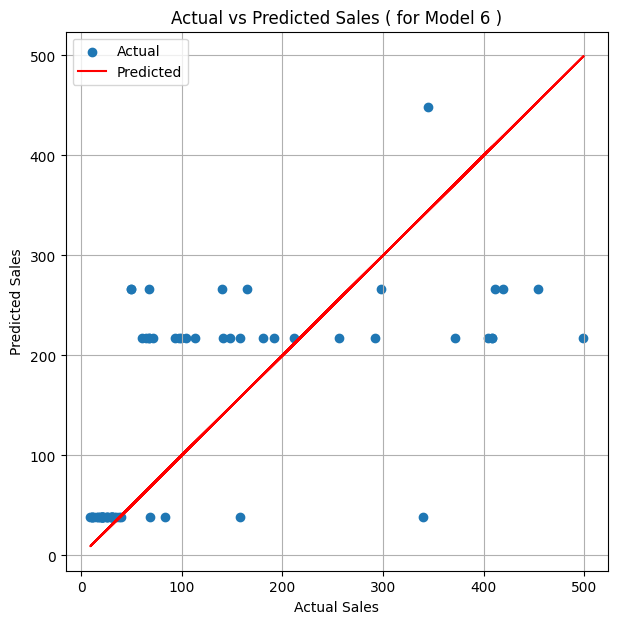

test set for model7
Performance of Model 7:

Mean Squared Error: 19307.437874106367 

Root Mean Squared Error: 138.95120681054328 

Mean Absolute Error: 111.5824 

Explained Variance Score: -0.1891260517118194 

R2 Score: -0.20583349129779194 





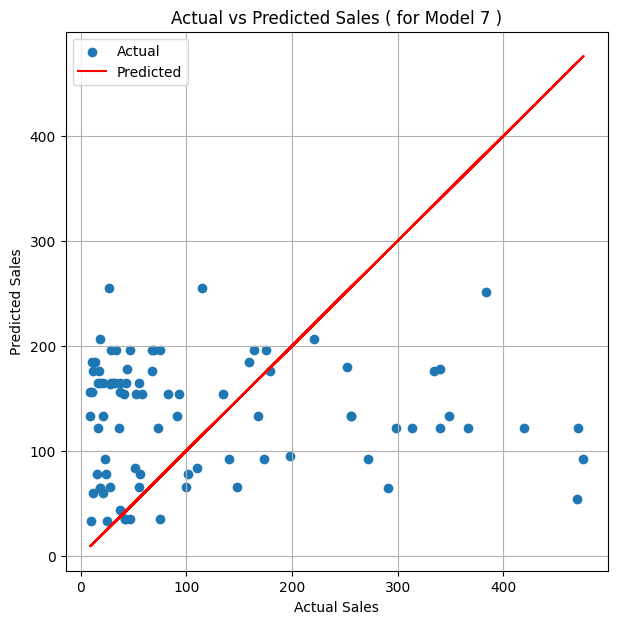



validation set for model7
Performance of Model 7:

Mean Squared Error: 22069.887390233336 

Root Mean Squared Error: 148.5593732829852 

Mean Absolute Error: 114.02743939393942 

Explained Variance Score: -0.16748356988887303 

R2 Score: -0.16807753209292464 





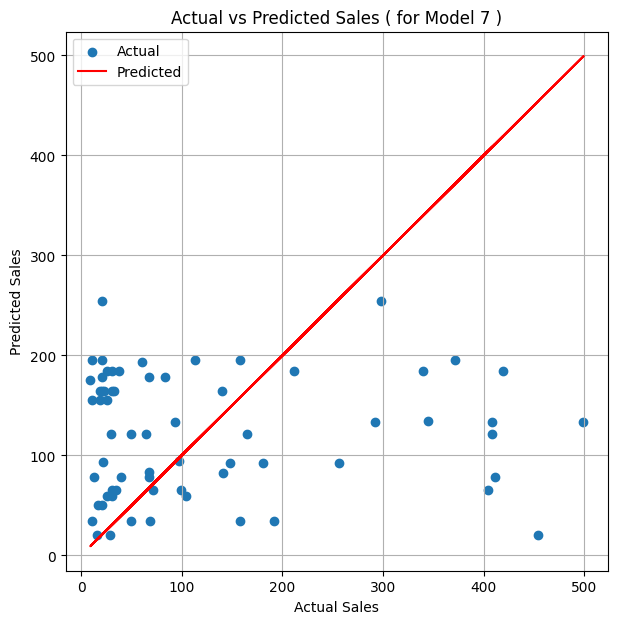

test set for model8
Performance of Model 8:

Mean Squared Error: 16779.04046939013 

Root Mean Squared Error: 129.5339355898296 

Mean Absolute Error: 93.68214385004173 

Explained Variance Score: 0.0005848181351991721 

R2 Score: -0.04792407370457985 





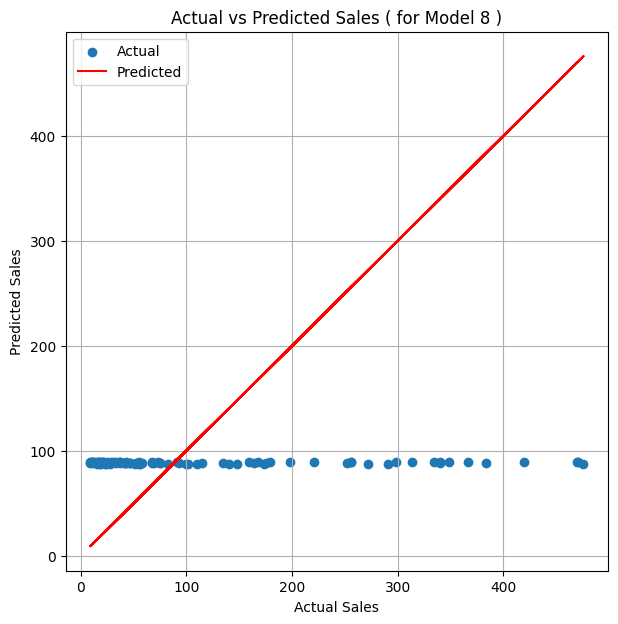



validation set for model8
Performance of Model 8:

Mean Squared Error: 20212.03383470558 

Root Mean Squared Error: 142.1690326150726 

Mean Absolute Error: 100.67817689863799 

Explained Variance Score: -7.852777088279694e-05 

R2 Score: -0.06974821315442936 





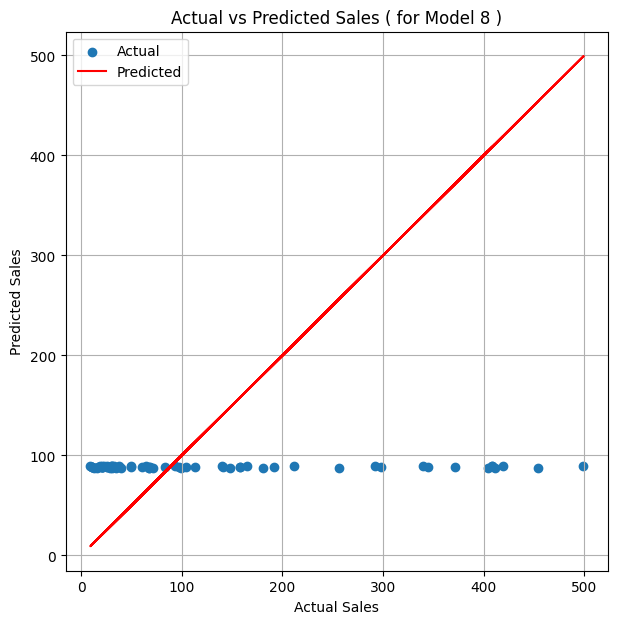

test set for model9
Performance of Model 9:

Mean Squared Error: 15582.295700329123 

Root Mean Squared Error: 124.8290659274879 

Mean Absolute Error: 101.83355702135728 

Explained Variance Score: 0.03562359914716384 

R2 Score: 0.026817843502598637 





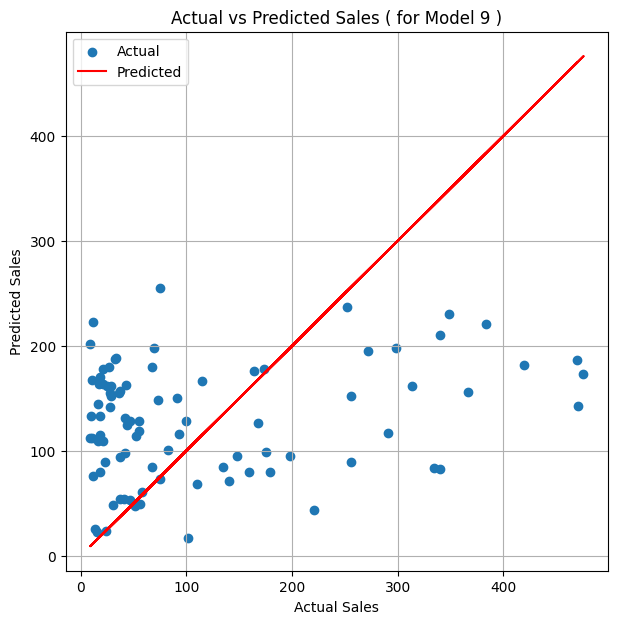



validation set for model9
Performance of Model 9:

Mean Squared Error: 25895.14616252848 

Root Mean Squared Error: 160.9196885484448 

Mean Absolute Error: 124.46766481717816 

Explained Variance Score: -0.3694330751145085 

R2 Score: -0.3705343343118903 





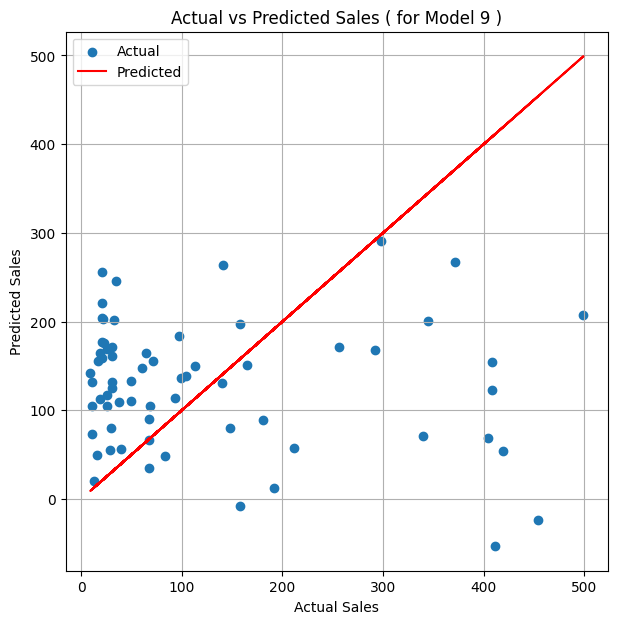

test set for model10
Performance of Model 10:

Mean Squared Error: 12887.448750715057 

Root Mean Squared Error: 113.52289967541816 

Mean Absolute Error: 91.6117495531479 

Explained Variance Score: 0.2052517311297305 

R2 Score: 0.1951227593052468 





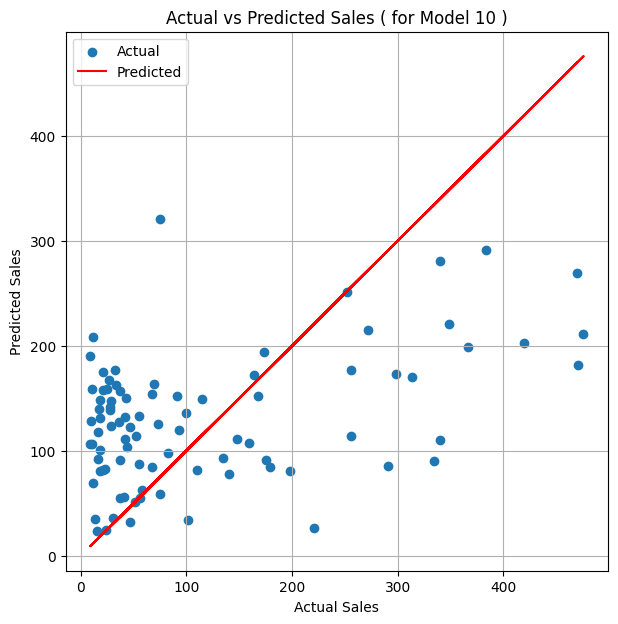



validation set for model10
Performance of Model 10:

Mean Squared Error: 26707.24865684478 

Root Mean Squared Error: 163.42352540820056 

Mean Absolute Error: 121.73502412788676 

Explained Variance Score: -0.41351016290788367 

R2 Score: -0.4135159164375555 





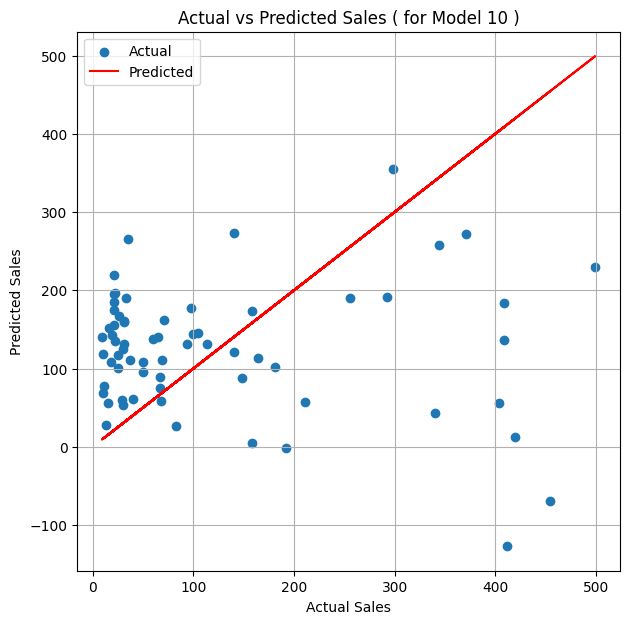

In [75]:
j=1
for i,k in zip([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10],
               [pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10]):
  print(f'test set for model{j}')
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(y_test, i),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, i)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(y_test, i),"\n")
  print("Explained Variance Score:", explained_variance_score(y_test, i),"\n")
  print("R2 Score:", r2_score(y_test, i),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(y_test,i)
  plt.plot(y_test,y_test,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.grid(True)
  plt.show()
  print("\n")
  print(f'validation set for model{j}')
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(y_val, k),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_val, k)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(y_val, k),"\n")
  print("Explained Variance Score:", explained_variance_score(y_val, k),"\n")
  print("R2 Score:", r2_score(y_val, k),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(y_val,k)
  plt.plot(y_val,y_val,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.grid(True)
  plt.show()
  j+=1

Mean Squared Error: 7882.007914227532
Root Mean Squared Error: 88.78067308951611
Mean Absolute Error: 69.22872788939782
Explained Variance Score: 0.516000812063635
R2 Score: 0.5077343154683223




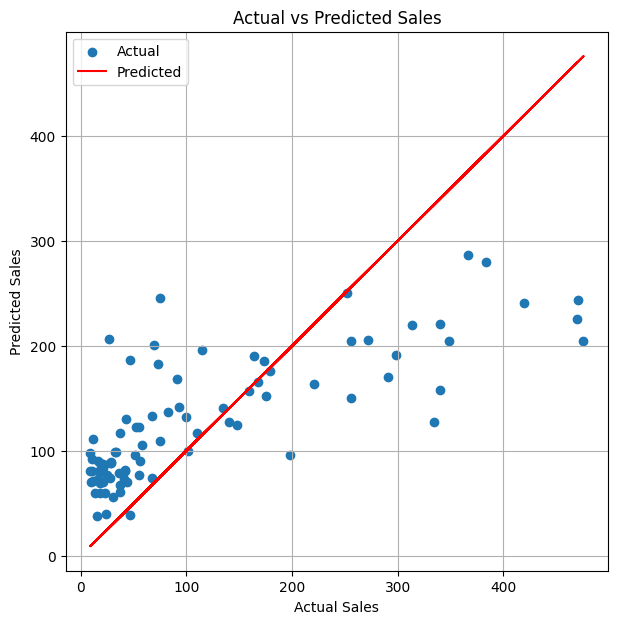

In [76]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10], axis=0)
print("Mean Squared Error:", mean_squared_error(y_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_final))
print("Explained Variance Score:", explained_variance_score(y_test, pred_final))
print("R2 Score:", r2_score(y_test, pred_final))
print('\n')
plt.figure(figsize=(7,7))
plt.scatter(y_test,pred_final)
plt.plot(y_test,y_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

Mean Squared Error: 12677.978832380037
Root Mean Squared Error: 112.5965311738334
Mean Absolute Error: 84.96625106536135
Explained Variance Score: 0.32905508724932464
R2 Score: 0.32900145956312277




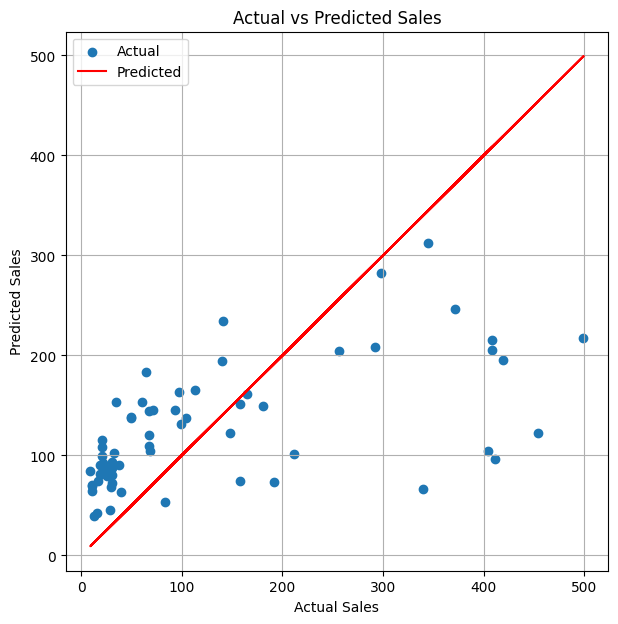

In [77]:
pred_final1 = np.mean([pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10], axis=0)
print("Mean Squared Error:", mean_squared_error(y_val, pred_final1))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_val, pred_final1)))
print("Mean Absolute Error:", mean_absolute_error(y_val, pred_final1))
print("Explained Variance Score:", explained_variance_score(y_val, pred_final1))
print("R2 Score:", r2_score(y_val, pred_final1))
print('\n')
plt.figure(figsize=(7,7))
plt.scatter(y_val,pred_final1)
plt.plot(y_val,y_val,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()
